In [1]:
import os
import sys
sys.path.append('../src')
import subprocess
from datetime import datetime
from preprocess import preprocess
from functions import random_points_in_circle, plot_particle_tracking, get_particles_from_satellite_image, get_satellite_products, run_ctracker

### Tracing Period

In [2]:
start = datetime(2023, 8, 21, 9)
end = datetime(2023, 8, 23, 9)

### Lake Selection
["ageri", "biel", "caldonazzo", "garda", "geneva", "greifensee",
 "hallwil", "joux", "lugano", "murten", "stmoritz", "zurich"]

In [3]:
lake = "geneva"

### Run ID

In [4]:
run_id = "satellite_test"

### Generate Particles

| satellite | parameter                                                                |
|-----------|--------------------------------------------------------------------------|
| sentinel2 | TUR_Nechad2016_665 (turbidity), geneva_p3qaa_zSD (secchi depth)          |
| sentinel3 | Zsd_lee (secchi depth), tsm_binding754 (turbidity), chla (cholorphyll A) |

In [5]:
total_particles = 100000
satellite = "sentinel3"
parameter = "tsm_binding754"
percent_remove = 90

In [6]:
product = get_satellite_products(satellite, lake, parameter, start)

Only one product available on 20230821
datalakes/sui/S3A_20230821T093923/POLYMER_tsm_binding754_S3A_20230821T093923_sui.tif
5393 pixels available


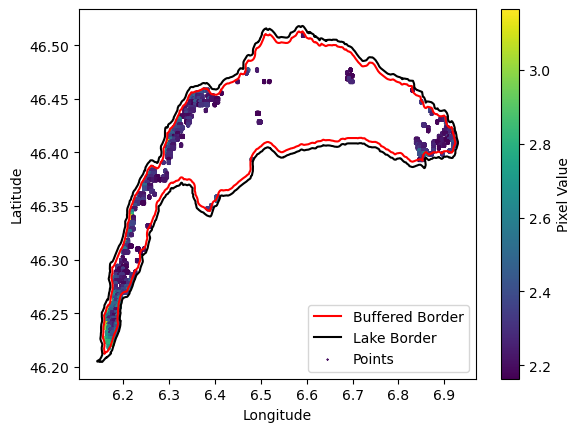

In [7]:
particles = get_particles_from_satellite_image(product, total_particles, lake, percentile=percent_remove)

### Preprocess inputs
This section generates the necessary input files to run ctracker

In [8]:
out = preprocess(run_id, lake, start, end, particles)

/home/runnalja/git/alplakes/particletracking/runs/geneva_202308210900_202308230900_satellite_test


## Run ctracker

Run on the command line
```
conda activate ctracker
cd ctracker
python run.py "working_dir"
```
Alternatively for small runs use the code below:

In [9]:
run_ctracker(out["working_dir"])


Initializing GCM information from configuration.py

Configuration loaded.

Using forward integration.

Reference date of GCM: 2008-03-01T00:00

Begin particle tracking simulation at: 2023-08-21T09:00

End particle tracking simulation at: 2023-08-23T09:00

Start seeding particles at: 2023-08-21T09:00

Stop seeding particles at: 2023-08-21T09:00

Simulation in 2D :  False
True

Identify seeding points

Point outside vertical bounds at x,y,z=508012.20,129365.36,0.58

Point outside vertical bounds at x,y,z=508021.68,129436.15,0.87

Point outside vertical bounds at x,y,z=508160.81,129323.25,0.84

Point outside vertical bounds at x,y,z=508131.31,129359.48,0.93

Point outside vertical bounds at x,y,z=507977.77,129374.46,0.86

Point outside vertical bounds at x,y,z=508115.64,129283.07,0.54

Point outside vertical bounds at x,y,z=508053.04,129448.34,0.56

Point outside vertical bounds at x,y,z=508034.61,129322.92,0.96

Point outside vertical bounds at x,y,z=507981.10,129326.61,0.94

Point outs

/home/runnalja/anaconda3/envs/ctracker/lib/python2.7/site-packages/xmitgcm/mds_store.py:696: UserWarning: Couldn't find available_diagnostics.log in /home/runnalja/git/alplakes/particletracking/runs/geneva_202308210900_202308230900_satellite_test/velocity_field. Using default version.
  "in %s. Using default version." % data_dir)
/home/runnalja/anaconda3/envs/ctracker/lib/python2.7/site-packages/xmitgcm/utils.py:314: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)
/home/runnalja/git/alplakes/particletracking/ctracker/ctracker/ctracker.py:176: RuntimeWarning: divide by zero encountered in true_divide
  self.dsmax = self.dtmax / self.dxyz
/home/runnalja/git/alplakes/particletracking/ctracker/ctracker/ctracker.py:361: RuntimeWarning: divide by zero encountered in double_scalars
  nx = (C * x + S * y) / dX
/home/runnalja/anaconda3/envs/ctracker/lib/python2.7/site-packages/xarray/backends/netCDF4_.py:324: UserWarning: endian-ness of 

### Plot results

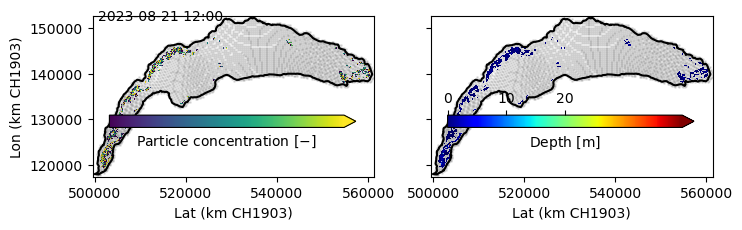

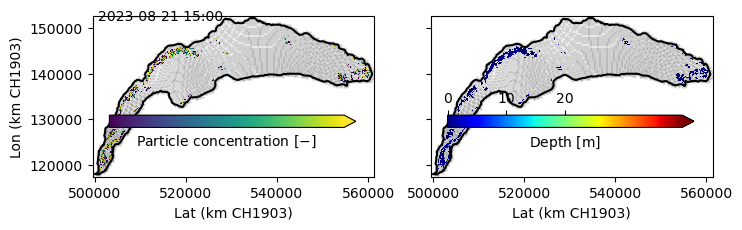

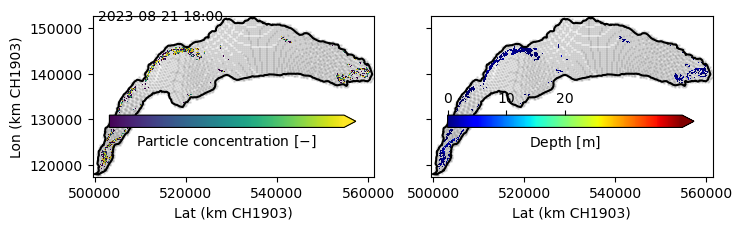

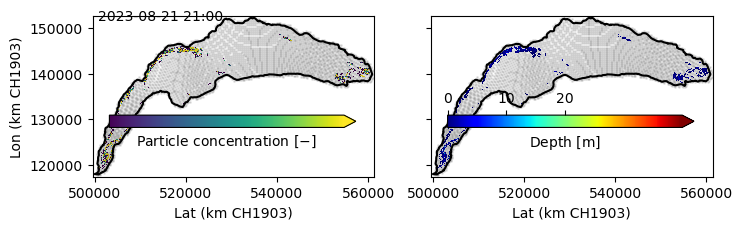

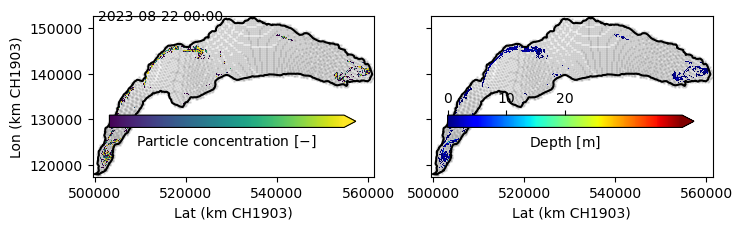

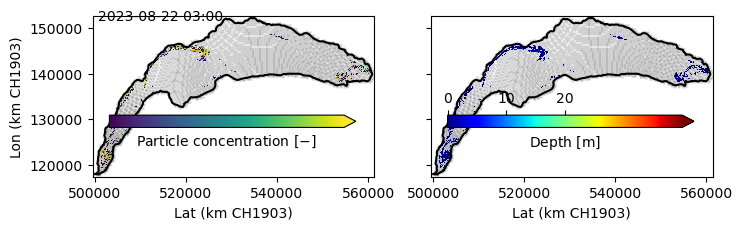

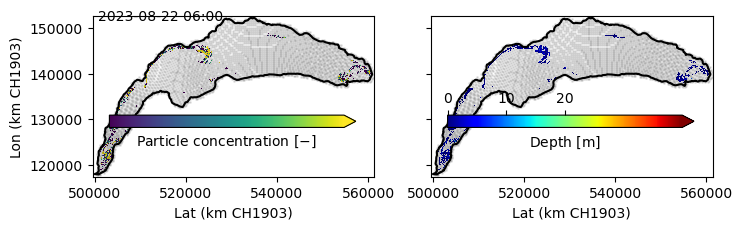

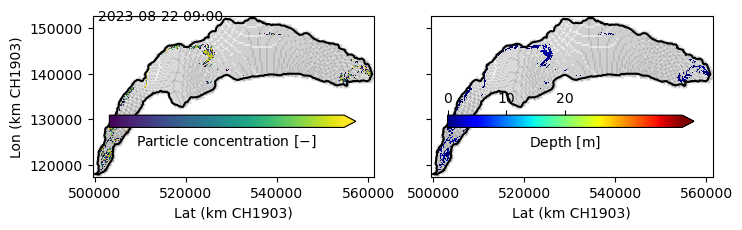

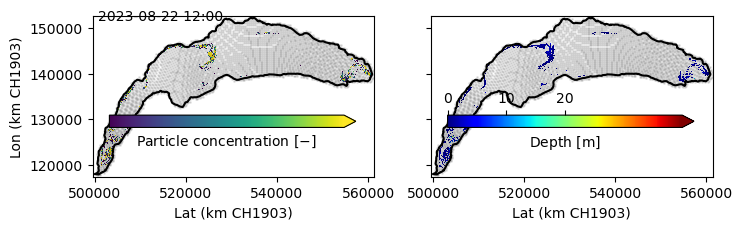

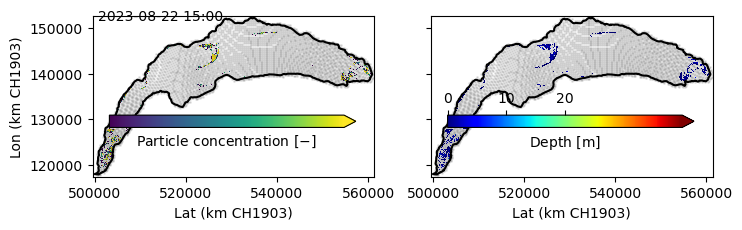

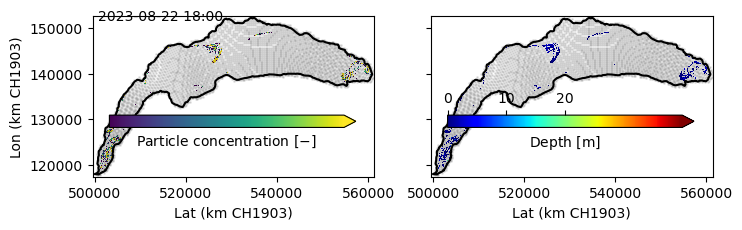

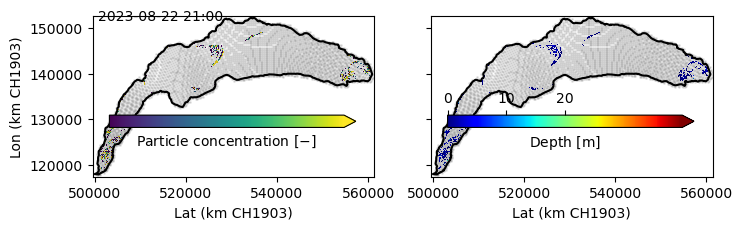

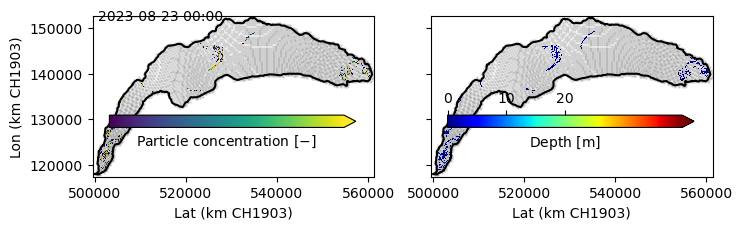

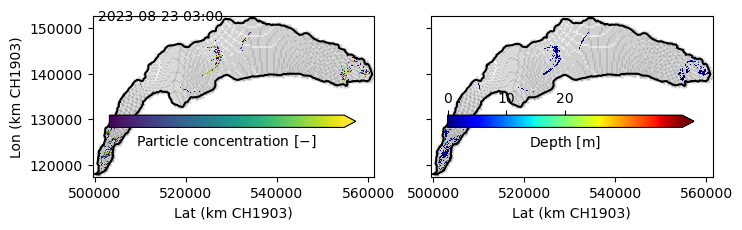

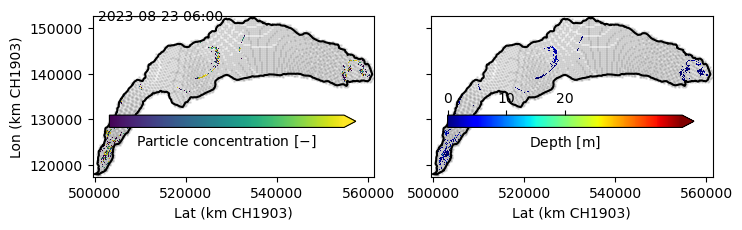

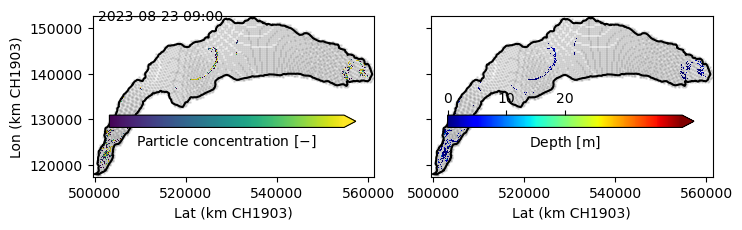

In [10]:
plot_particle_tracking(out["working_dir"], out["x0"], out["y0"], out["x1"], out["y1"], lake, grid_type=out["grid_type"], save=True)